# Performing linear regression using various methods

<img align='left' style='padding-right:15px' src='https://miro.medium.com/max/640/1*LEmBCYAttxS6uI6rEyPLMQ.png' height='110px' width='150px'>

*The section below contains various way of applying linear regression. The cells below contains linear regression code applied on a small data set generated using some function.*

In [ ]:
# Imports the necessary modules
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
# Creates the dataset
x = np.linspace(0,2,500)
y = np.cos(x) + 1.2*x + 0.25
#y = np.sqrt(16-x**2)
#y = 3*x + 15

# Sets the constant value for noise
np.random.seed(10)

noise = np.random.normal(0, 0.08, x.shape)
y = y + noise
x = x - 0.5

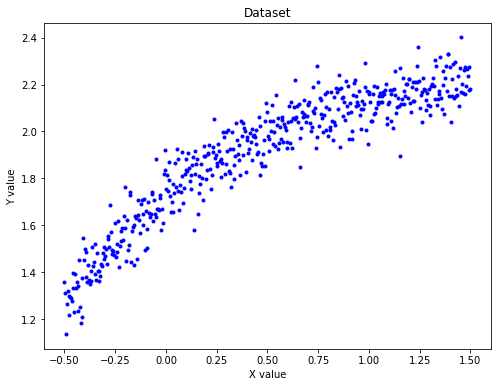

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Dataset")
plt.xlabel('X value')
plt.ylabel('Y value')
plt.scatter(x, y, marker='.', color='blue')

## Linear Regression Using Least Square Method

<!--NAVIGATION-->
*To understand the least square method please do visit here: [The Least Squares Method](https://docs.google.com/document/d/1vXgizn0Zz5VM_mTEfrRqwydfCyn0OY5DNlkieFLRU68/edit)*

In [ ]:
# Regression model
def regression(x,y):
  n = len(x)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_s_squared = np.sum(np.square(x))
  sum_xy = np.sum(x*y)

  # Slope
  m = (n*sum_xy - sum_x*sum_y)/(n*sum_s_squared - sum_x**2)
  # y-intercept
  c = (sum_y - m*sum_x)/n

  return m, c

# Function to calculate squared error
def squared_error(actual, observed):
  return np.sum((actual-observed)**2)

# Function to calculate r-squared
def r_squared(actual, observed):
  var_mean = np.var(actual)
  var_fit = squared_error(actual, observed)/len(actual)
  return (var_mean-var_fit) / var_mean

# Cost function for gradient descent
def cost_function(actual, observed):
  return 1/(2*len(actual))*squared_error(actual, observed)

In [ ]:
# Calling the module
slope, intercept = regression(x,y)
print("slope:",slope,"    intercept:",intercept)

# Array of predictions
y_guess = slope*x + intercept

# Calculates the squared error
print("Error:", squared_error(y, y_guess))

# Calculates R-squared
print("R-squared:", r_squared(y, y_guess))

## Prints the correlation coefficient
#print(np.corrcoef(y, y_guess))

# Calculates the cost function (mean squared deviation)
print("Cost function:", cost_function(y, y_guess))

slope: 0.43508306120378387     intercept: 1.6892619301838387
Error: 5.85168791014004
R-squared: 0.844070102820131
Cost function: 0.00585168791014004


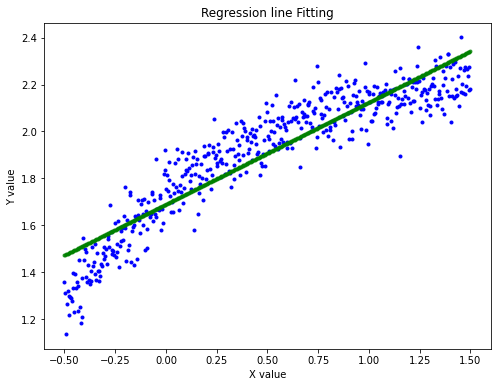

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Regression line Fitting")
plt.xlabel('X value')
plt.ylabel('Y value')
plt.scatter(x, y, marker='.', color='blue')
plt.scatter(x, y_guess, marker='.', color='green', alpha=0.7)

## Linear Regression using Matrix Multiplication 

In [ ]:
# Linear Regression using matrix multiplication
X = np.column_stack((x, np.ones(x.shape)))
w = np.empty(X.ndim)
Y = y.reshape(-1, 1)

In [ ]:
w = np.linalg.pinv(X)@Y
w

array([[0.43508306],
       [1.68926193]])

In [ ]:
Y_pred = X @ w
error = squared_error(Y.flatten(), Y_pred.flatten())
print(error)

5.85168791014004


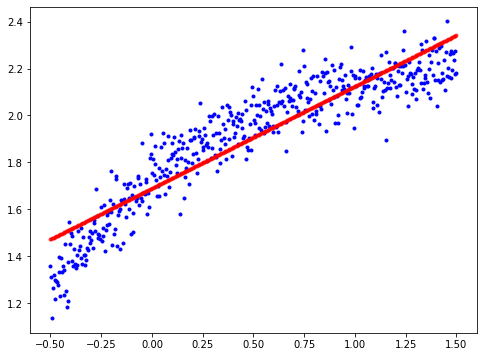

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, marker='.', color='b',)
plt.scatter(x, Y_pred, marker='.', color='r', alpha=0.6)

## Linear Regression Using Gradient Descent

In [ ]:
# Cost Function
m, c = 0, 0
alpha = 0.1
hyp = m*x + c
cost = np.array([])
for i in range(100000):
  d_c = 1/len(x)*np.sum((hyp - y))
  d_m = 1/len(x)*np.sum((hyp-y)*x)
  m = m-alpha*d_m
  c = c-alpha*d_c
  hyp = m*x+c
  cost = np.append(cost, cost_function(y, hyp))

print("cost function: ", cost_function(y, hyp))
print("m:",m,"    c:",c)
y_hat = m*x+c

cost function:  0.005851687910140039
m: 0.4350830612037868     c: 1.6892619301838363


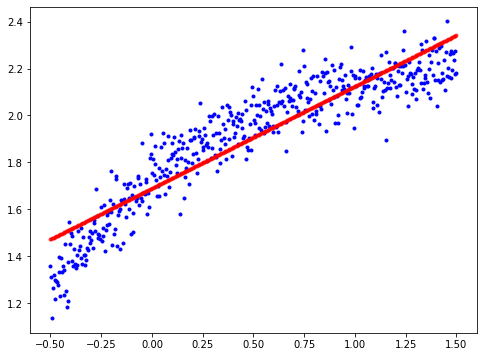

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, marker='.', color='b',)
plt.scatter(x, y_hat, marker='.', color='r', alpha=0.6)  

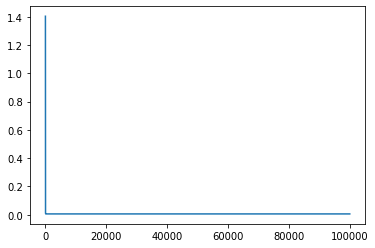

In [ ]:
plt.plot(np.array(range(1,100001)), cost)

## <p style='color:red'>The contour plot (which of course doesn't look like so) needs to be fixed.</p>

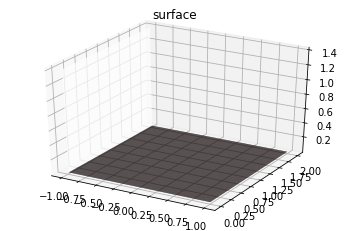

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
theta0 = np.linspace(-1,1,200)
theta1 = np.linspace(0,2,200)
X, Y = np.meshgrid(theta0, theta1)
cost_z = cost[0::500]
COST_Z = np.tile(cost_z, (len(cost_z), 1))

ax.plot_surface(X, Y, COST_Z, rstride=1, cstride=1,
                cmap='hot', edgecolor='none')
ax.set_title('surface');

/usr/local/lib/python3.7/dist-packages/scipy/stats/kde.py:581: RuntimeWarning: invalid value encountered in sqrt
  self._norm_factor = sqrt(linalg.det(2*pi*self.covariance))
/usr/local/lib/python3.7/dist-packages/matplotlib/contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.7/dist-packages/matplotlib/contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  **contour_kws,


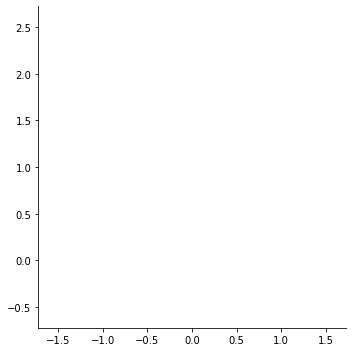

In [ ]:
sns.displot(x=theta0, y=theta1, kind='kde')